<a href="https://colab.research.google.com/github/BroodrickVM/BroodrickVM/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DC Crime Analysis with Matplotlib

This notebook combines multiple years of Washington DC crime data and creates **two different visuals** using **Matplotlib**.  
We will follow these steps:
1. Import libraries  
2. Load and append all CSV files  
3. Create Visual 1: Monthly crime trends (line chart)  
4. Create Visual 2: Top 10 offense types (bar chart)  
5. Save merged data and figures


In [ ]:
#Step 1: Import required libraries
#Pandas is for data manipulation, Matplotlib is for plotting
import pandas as pd
import matplotlib.pyplot as plt

## Step 2. Load and Append All CSV Files

- We will use Python's `glob` to find all files named `Crime_Incidents_in_*.csv`  
- Each file is read into a DataFrame with `pd.read_csv`  
- We append (concatenate) them together into one dataset  
- We also extract the year and month from the `REPORT_DAT` column


In [ ]:
import glob

#Find all CSV files in the current folder
csv_files = glob.glob("Crime_Incidents_in_*.csv")

#Read and combine all years
df_list = [pd.read_csv(f, low_memory=False, parse_dates=['REPORT_DAT']) for f in csv_files]
crime = pd.concat(df_list, ignore_index=True).dropna(subset=['REPORT_DAT'])

#Add year and month columns
crime['YEAR'] = crime['REPORT_DAT'].dt.year
crime['MONTH'] = crime['REPORT_DAT'].dt.to_period('M').dt.to_timestamp()

print("Dataset shape:", crime.shape)
print("Years covered:", sorted(crime['YEAR'].unique()))

Dataset shape: (546331, 27)
Years covered: [np.int32(2009), np.int32(2010), np.int32(2011), np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025)]


/tmp/ipython-input-1853326817.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  crime['MONTH'] = crime['REPORT_DAT'].dt.to_period('M').dt.to_timestamp()


## Step 3. Visual 1 — Monthly Crime Trend (Line Chart)

- We group by `MONTH` to count incidents per month  
- Use `plt.plot()` to make a line chart (as shown in the Matplotlib intro class)  
- Add title, axis labels, and rotate x-axis labels for readability  
- Save the figure as `visual1_line_trend.png`


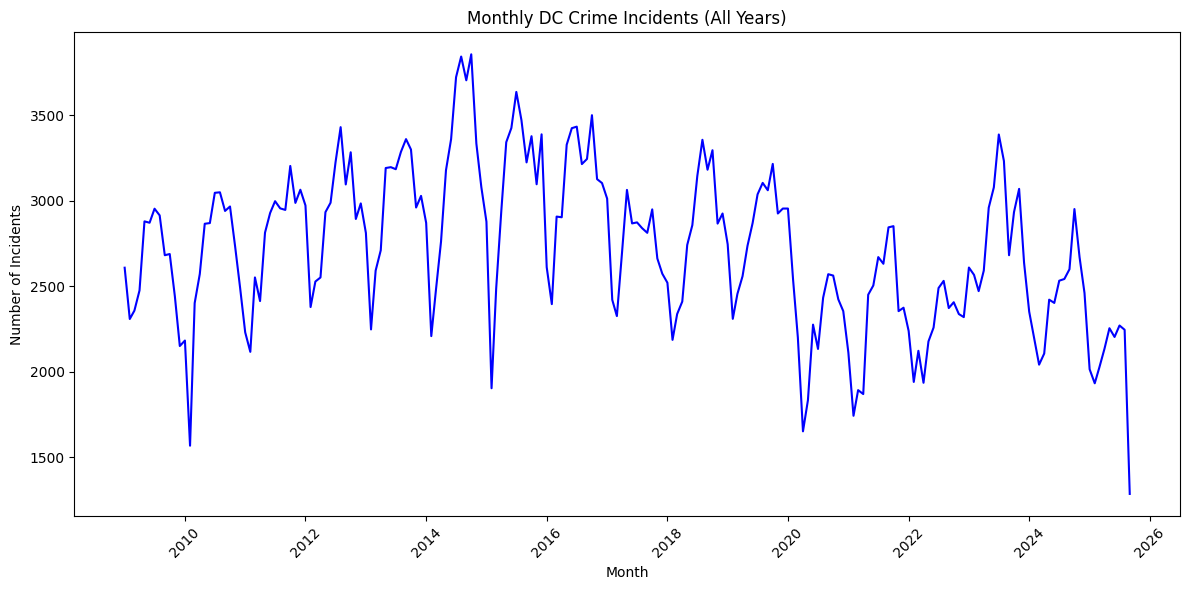

In [ ]:
monthly_counts = crime.groupby("MONTH").size()

plt.figure(figsize=(12,6))
plt.plot(monthly_counts.index, monthly_counts.values, color="blue")
plt.title("Monthly DC Crime Incidents (All Years)")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("visual1_line_trend.png")
plt.show()


**Output meaning:**  
- Each point represents the total number of reported crime incidents in that month.  
- The line helps us see **trends over time**: for example, crime may rise in summer months and fall in winter.  
- Any long-term increase or decrease shows whether overall crime is getting worse or better across the years.  
- Sharp peaks or dips could be due to unusual events in those months (e.g., policy changes, lockdowns, special events).


## Step 4. Visual 2 — Top 10 Offense Types (Bar Chart)

- We use the `OFFENSE` column to count the most common crime types  
- Select the top 10 offense types  
- Use `plt.bar()` to make a bar chart (as taught in the intro class)  
- Rotate x-axis labels so they don’t overlap  
- Save the figure as `visual2_bar_offenses.png`


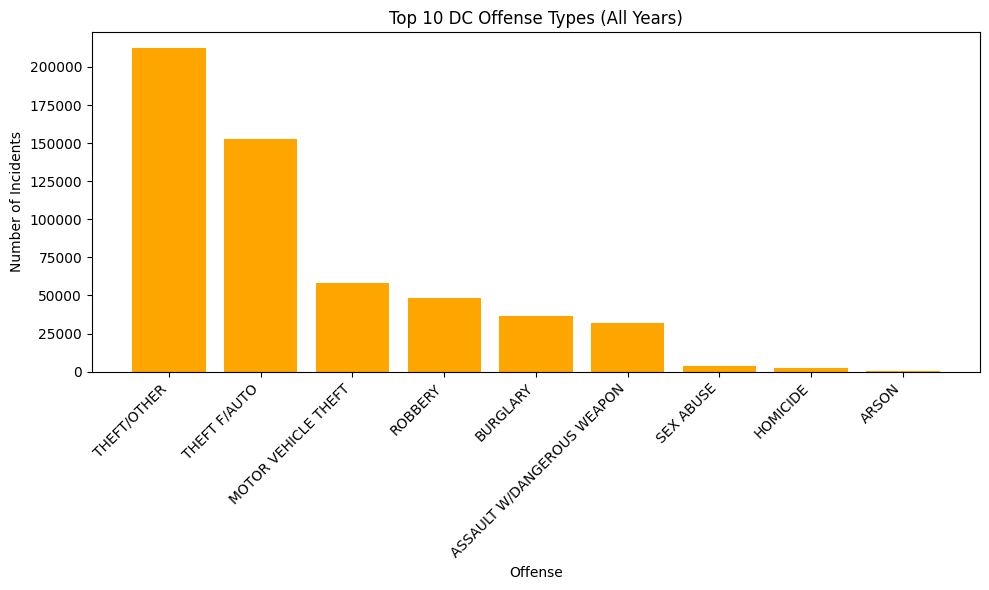

In [ ]:
top_offenses = crime['OFFENSE'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.bar(top_offenses.index, top_offenses.values, color="orange")
plt.title("Top 10 DC Offense Types (All Years)")
plt.xlabel("Offense")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("visual2_bar_offenses.png")
plt.show()


**Output meaning:**  
- The bars show the **top 10 most common crime types** in DC across all years combined.  
- The tallest bar represents the **single most frequent crime** (likely Theft or Assault, depending on the dataset).  
- Shorter bars represent less common but still significant crime types.  
- This output lets us identify the **main categories driving crime rates** in DC.


## Step 5. Save the Combined Dataset

Export the merged dataset to CSV for future use.  
This ensures that if we (or someone else) want to use the cleaned dataset, we don’t need to reload all files again.


In [ ]:
crime.to_csv("DC_Crime_All_Years.csv", index=False)
print("Saved merged dataset: DC_Crime_All_Years.csv")


Saved merged dataset: DC_Crime_All_Years.csv
